# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Passo 1. Abrindo o arquivo de dados e estudando as informações gerais

In [2]:
df_raw  = pd.read_csv('/datasets/games.csv')

In [3]:
df_raw.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Algumas colunas estão com valores faltantes e com seu tipo errado, os números de vendas por regiões parece bom, o que é algo muito bom, pois não terei perdas de informação para essa análise

## Passo 2. Preparando os dados

### Substituir os nomes das colunas (transformar tudo em minúsculos).

In [6]:
df_raw.rename(columns=str.lower,inplace=True)

### Convertendo os dados para os tipos necessários.

Para alguns dados primeiro irei corrigir e decidir oq fazer com os dados faltantes para depois converte-los

### Descrevendo as colunas onde os tipos de dados foram alterados e por quê.

[ year_of_release  -> mudarei de float para int, pois faz mais sentido ter o ano como um número inteiro]

[ user_score       -> esta como object gostaria de alterar para float, mas primeiro preciso preencher os dados faltantes]

[ na_sales, eu_sales, jp_sales, other_sales -> não será convertido para inteiro, pois estes número esta em milhões, logo as casas decimais são em realidade valores em Mil ]

#### Verificando os valores ausentes

In [7]:
df_raw.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df_raw[df_raw['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [9]:
df_raw[df_raw['genre'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df_raw[df_raw['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [11]:
df_raw[df_raw['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [12]:
df_raw[df_raw['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


#### Retirando o valor ausente da coluna Name pois possuia muitos valores nas linhas ausentes e não poderia preencher com um nome aleatorio, pro consequencia retirei os 2 valores ausentes de genero 

In [13]:
df_raw.dropna(subset=['name'],inplace=True)

#####  Preenchendo a coluna de ano de lançamento

In [14]:
fill_ano = pd.pivot_table(df_raw,index='platform',values='year_of_release',aggfunc='median')
fill_ano.columns=['ano']
fill_ano.head()

,ano
platform,
2600,1982.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0


In [15]:
def fill(row):
    if pd.isna(row['year_of_release']):
        return fill_ano['ano'][row['platform']]
    return row['year_of_release']

In [16]:
df_raw['year_of_release'] = df_raw.apply(fill, axis=1)

#####  Preenchendo a coluna de rating

In [17]:
df_raw['rating'].fillna('nenhum',inplace=True)

##### Criando um DataFrame sem os valores nulos para usar em analises 

In [18]:
df_sem_nulos = df_raw.dropna()

Como os  jogos estão categorizados por plataformas, vou preencher o ano que foi lançado com a mediana dos jogos lançados dentro da plataforma.

A coluna dos nomes e dos generos resolvi eliminar pois as duas linhas que não possuiam nome e genero definidos não possuiam outros valores preenchidos, além disso as vendas que estavam representadas eram muito baixas, logo não faria tanta diferença retira-las agora, acredito inclusive que acabariam saindo no filtro de outliers, mais a frente.

Na coluna Rating optei por preencher os dados faltantes com a palavra "nenhum" para mostrar que não possuiem uma classificação como as demais

As outras colunas optei por não preencher para que sirvam como análise pois estão tendo algum problema ou na coleta dos dados, ou no momento de passar esses dados para a tabela ou em outro ponto e deve-se procurar entender

#### Observando à abreviação TBD.

In [19]:
df_raw[df_raw['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Como são muitos casos de tbd deixarei a abreviação tbd como está, para que sirva como análise de pontuações futuras

### Calculando a soma de todas as vendas e colocando em uma coluna separada

In [20]:
def soma(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales'] 

In [21]:
df_raw['sum_sales'] = df_raw.apply(soma,axis=1)

In [22]:
df_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nenhum,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nenhum,31.38


## Passo 3. Analise os dados

### Observando quantos jogos foram lançados em anos diferentes.

In [23]:
jogo_ano = pd.pivot_table(df_raw,index='year_of_release',values='name',aggfunc='count')
jogo_ano.columns=['Jogos']
jogo_ano

,Jogos
year_of_release,
1980.0,9
1981.0,46
1982.0,53
1983.0,17
1984.0,14


Podemos ver que em 1994, 1995 e principalmente 2002,  a quantidade de jogos aumenta muito sendo o dobro do ano anterior.

### Vendas totais por plataforma

In [24]:
vendas_platform = pd.pivot_table(df_raw,index=['platform'],values=['sum_sales'],aggfunc='sum')
vendas_platform.columns=['vendas totais']
vendas_platform.sort_values(by=['vendas totais'],ascending=False,inplace=True)
top_vendas = vendas_platform.head(6)
top_vendas.reset_index(inplace=True)
top_vendas

,platform,vendas totais
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [25]:
vendas_Ano_platform = pd.pivot_table(df_raw,index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
vendas_Ano_platform.fillna(0,inplace=True)
vendas_Ano_platform.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,35.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,39.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,5.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='year_of_release'>

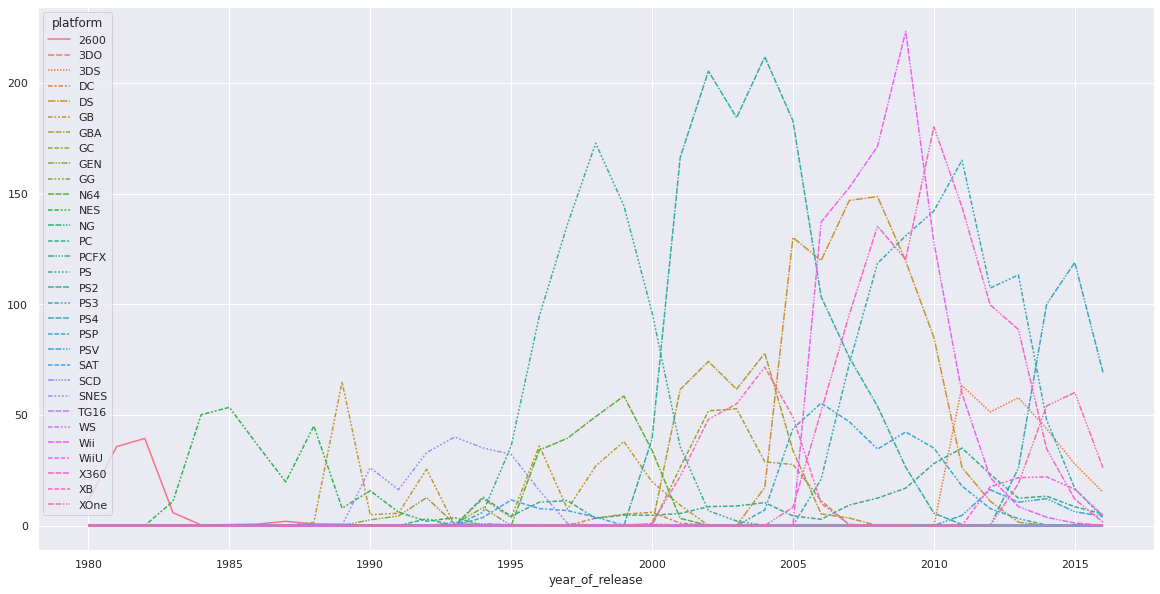

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=vendas_Ano_platform)

Podemos ver que de forma geral levam 10 anos para novas plataformas surgirem e por volta desse tempo as plataformas mais antigas começam a decair 

Irei olhar para os dados posteriores 1995, olhando para o gráfico gerado parece ser o inicio de um momento de maior volume de jogos vendidos, além do surgimento de novas plataformas e o fim de outras, permitindo que a análise tenha uma visão ampla de todo o cenário 

In [27]:
top_vendas['platform'].to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [28]:
vendas_filtradas = vendas_Ano_platform.drop(['2600', '3DO', '3DS', 'DC', 'GB', 'GBA', 'GC',\
                         'GEN', 'GG', 'N64','NES', 'NG', 'PC', 'PCFX',\
                         'PS4', 'PSP', 'PSV','SAT', 'SCD', 'SNES', 'TG16', 'WS',  'WiiU',  'XB','XOne'],axis=1)

In [29]:
top_vendas_filtradas = vendas_filtradas[vendas_filtradas.index >= 1995]

<AxesSubplot:xlabel='year_of_release'>

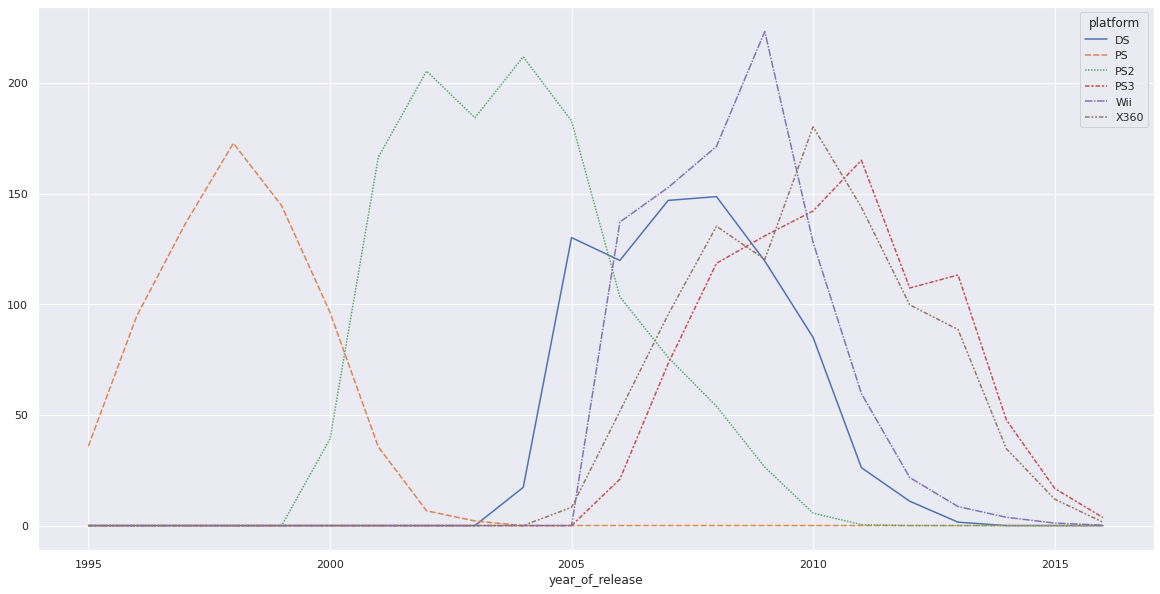

In [30]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=top_vendas_filtradas)

Uma visualização mais especifica das plataformas que mais venderam de 1995 até 2015

Pelo Gráfico vemos que todas as plataformas com as maiores vendas estão caindo em vendas. Faz um certo sentido pois em sua maioria foi criada em 2005 e seguem a tendencia de decairem após 10 anos 

Não vou utilizar a mesma tabela anterior, pois os "0" adicionados poderiam alterar os valores das médias, medianas e outliers

In [31]:
vendas_Ano_platform = pd.pivot_table(df_raw,index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')

In [32]:
vendas_Ano_platform.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


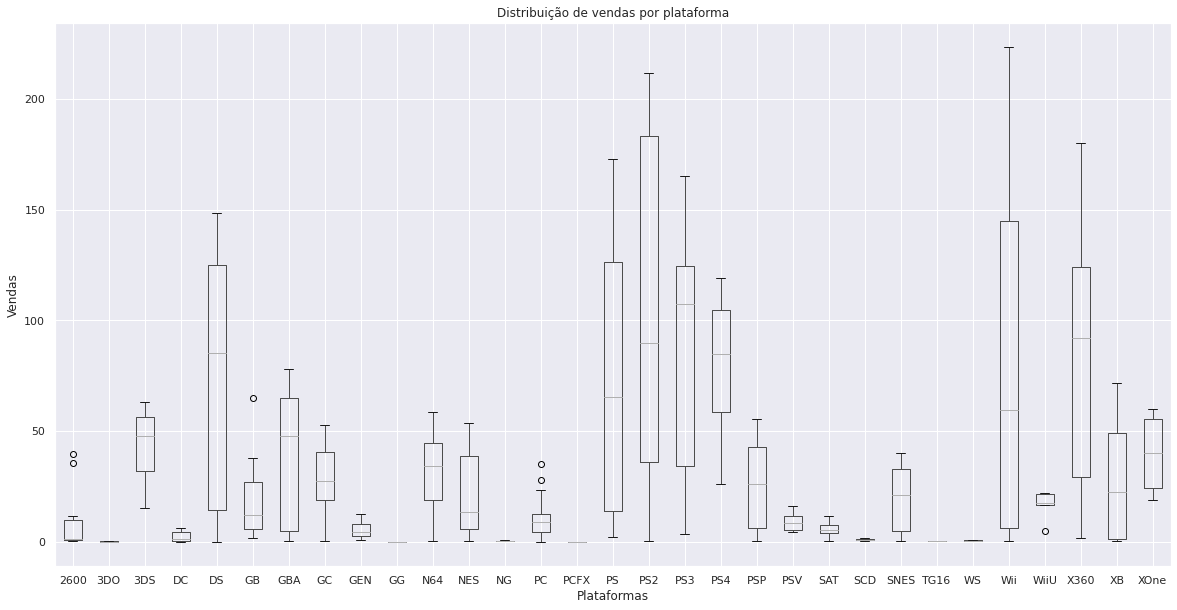

In [33]:
vendas_Ano_platform.boxplot()
plt.title('Distribuição de vendas por plataforma')
plt.xlabel('Plataformas') 
plt.ylabel('Vendas') 
plt.show()

Podemos ver uma grande diferença na quantidade de vendas entre as 6 maiores plataformas e o restante. Não só os outliers mas as vendas médias também.

### Aqui vou escolher a plataforma PS2, principalmente por ser a maior em quantidade de vendas.

In [34]:
df_ps2 = df_raw[df_raw['platform'] == 'PS2'].dropna()
df_ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


In [35]:
df_ps2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,sum_sales
year_of_release,1.000000,-0.054653,-0.153321,-0.060526,0.062430,-0.098973,-0.065925
na_sales,-0.054653,1.000000,0.648562,0.264077,0.576080,0.397260,0.926931
eu_sales,-0.153321,0.648562,1.000000,0.283279,0.272145,0.301020,0.766832
jp_sales,-0.060526,0.264077,0.283279,1.000000,0.215766,0.218333,0.452395
other_sales,0.062430,0.576080,0.272145,0.215766,1.000000,0.212810,0.716615
critic_score,-0.098973,0.397260,0.301020,0.218333,0.212810,1.000000,0.395435
sum_sales,-0.065925,0.926931,0.766832,0.452395,0.716615,0.395435,1.000000


<AxesSubplot:>

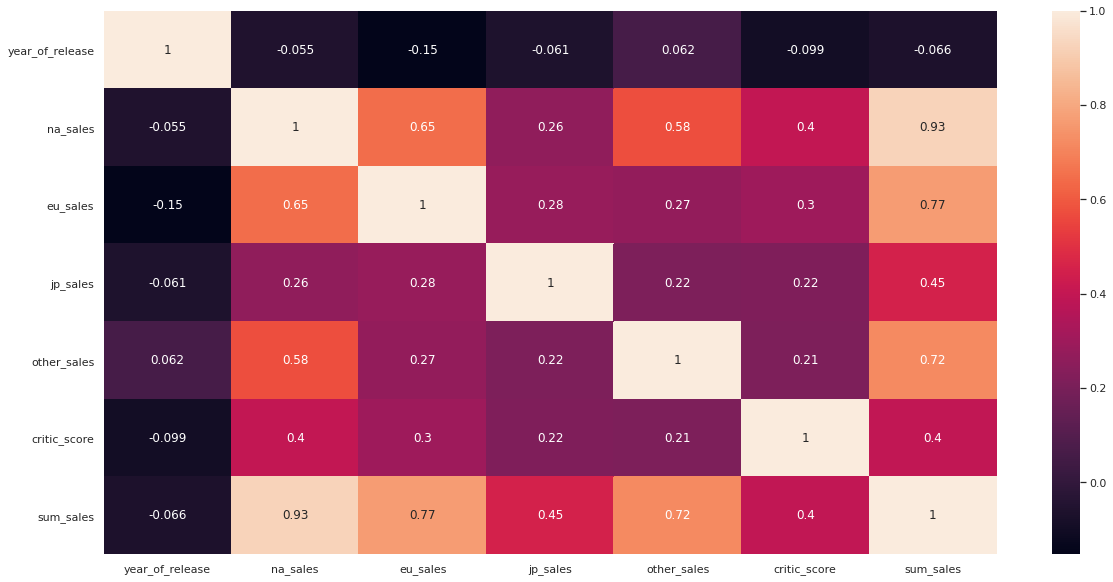

In [36]:
sns.heatmap(df_ps2.corr(),annot = True)

Existe sim uma correlação entre a critica especializada e as vendas, principalmente na região NA, porém as criticas dos usuários não tem tanta influencia na compra dos jogos em nenhuma região. 

<Figure size 720x1440 with 0 Axes>

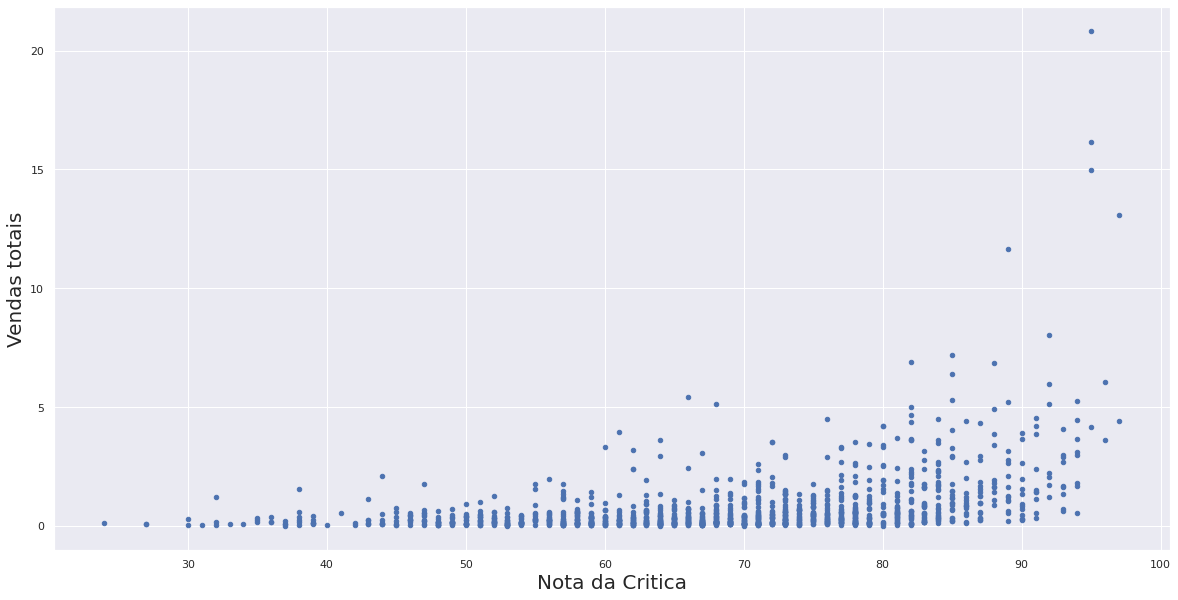

In [37]:
plt.figure(figsize=(10, 20))
df_ps2.plot.scatter(x='critic_score',y='sum_sales',c='b')
plt.xlabel('Nota da Critica',fontsize=20)
plt.ylabel('Vendas totais',fontsize=20)
plt.show()

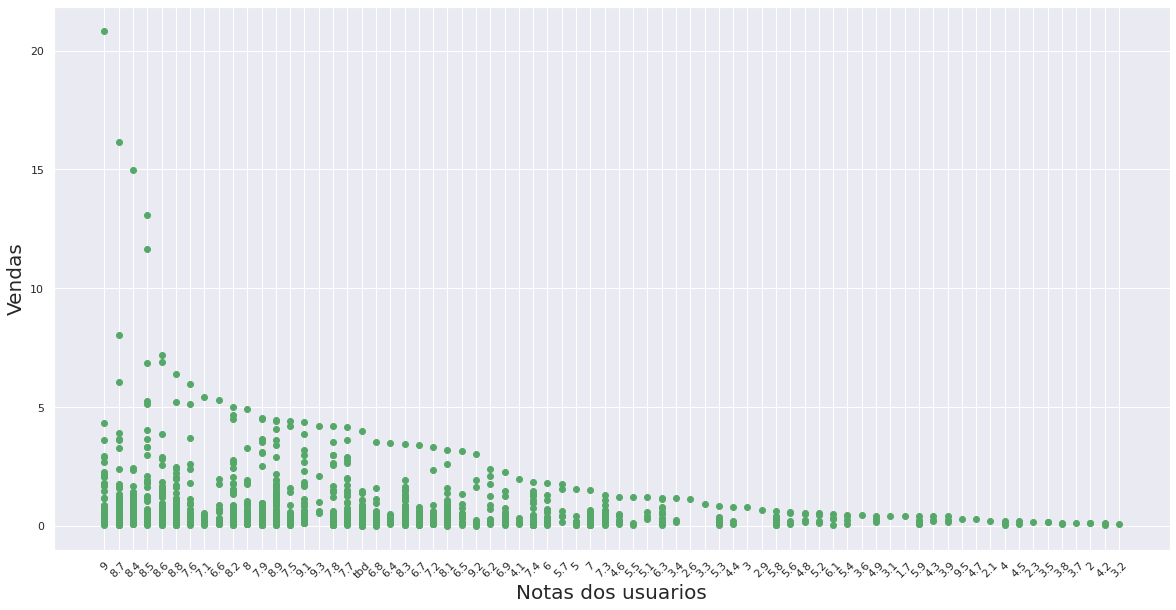

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(df_ps2['user_score'],df_ps2['sum_sales'],c='g')
plt.xlabel('Notas dos usuarios',fontsize=20)
plt.ylabel('Vendas',fontsize=20)
plt.xticks(rotation = 45)
plt.show()

Podemos ver que realmente jogos com notas mais altas tem números de vendas melhores, mas fica a dúvida se as notas influenciam na quantidade de compras ou seas notas altas são puramente consequencias de um bom jogo, podendo ainda ser uma consequencia mutua

### Comparando as vendas dos mesmos jogos em outras plataformas.

In [39]:
lista_jogos_ps2 = df_ps2['name'].to_list()
lista_jogos_ps2

['Grand Theft Auto: San Andreas',
 'Grand Theft Auto: Vice City',
 'Gran Turismo 3: A-Spec',
 'Grand Theft Auto III',
 'Gran Turismo 4',
 'Final Fantasy X',
 'Need for Speed Underground',
 'Need for Speed Underground 2',
 'Medal of Honor: Frontline',
 'Kingdom Hearts',
 'Metal Gear Solid 2: Sons of Liberty',
 'Final Fantasy XII',
 'Crash Bandicoot: The Wrath of Cortex',
 'Final Fantasy X-2',
 'Madden NFL 2004',
 'Dragon Quest VIII: Journey of the Cursed King',
 'Medal of Honor: Rising Sun',
 'Guitar Hero II',
 'Guitar Hero III: Legends of Rock',
 'Madden NFL 06',
 'The Lord of the Rings: The Two Towers',
 'Madden NFL 2005',
 'Madden NFL 07',
 'Spider-Man: The Movie',
 'God of War',
 "Tony Hawk's Pro Skater 3",
 'Winning Eleven: Pro Evolution Soccer 2007',
 'Need for Speed: Most Wanted',
 'Kingdom Hearts II',
 'Metal Gear Solid 3: Snake Eater',
 'FIFA Soccer 06',
 'EyeToy Play',
 'Madden NFL 2003',
 'God of War II',
 'Tekken Tag Tournament',
 'Namco Museum: 50th Anniversary',
 "Tony Haw

In [40]:
def listaFiltro(dataframe, valores):
    return dataframe.loc[dataframe['name'].isin(valores)]

df_inter = listaFiltro(df_raw, lista_jogos_ps2)
df_compara_ps2 = df_inter[df_inter['platform']!='PS2']
df_compara_ps2 = df_compara_ps2.dropna()
df_compara_ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
204,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,1.70,1.99,0.16,1.18,86.0,8,M,5.03
234,Guitar Hero III: Legends of Rock,Wii,2007.0,Misc,3.04,1.11,0.00,0.43,86.0,8.4,T,4.58
239,Guitar Hero III: Legends of Rock,X360,2007.0,Misc,3.19,0.91,0.01,0.42,85.0,7.9,T,4.53
266,Namco Museum,GBA,2001.0,Misc,3.00,1.11,0.05,0.07,79.0,7.3,E,4.23


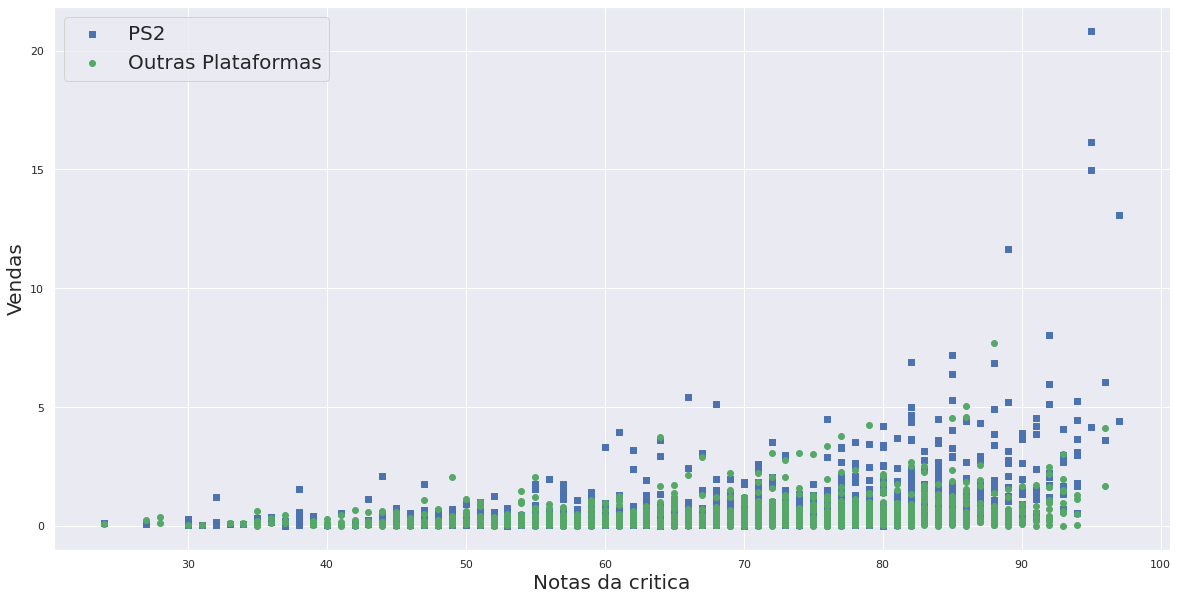

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_ps2['critic_score'],df_ps2['sum_sales'], c='b', marker="s", label='PS2')
ax1.scatter(df_compara_ps2['critic_score'],df_compara_ps2['sum_sales'], c='g',  label='Outras Plataformas')
plt.legend(loc='upper left',fontsize=20)
ax1.set_xlabel('Notas da critica',fontsize=20)
ax1.set_ylabel('Vendas',fontsize=20)
plt.show()

[ A distribuição é bem semelhante, os jogos no PS2 parecem receber uma nota um pouco mais alta de forma geral pela critica especializada, e como visto na correlação vendasXcriticaEspecializada, uma venda maior nessa plataforma é vista, tendo um por vezes número de vendas bem mais alto em alguns titulos. ]

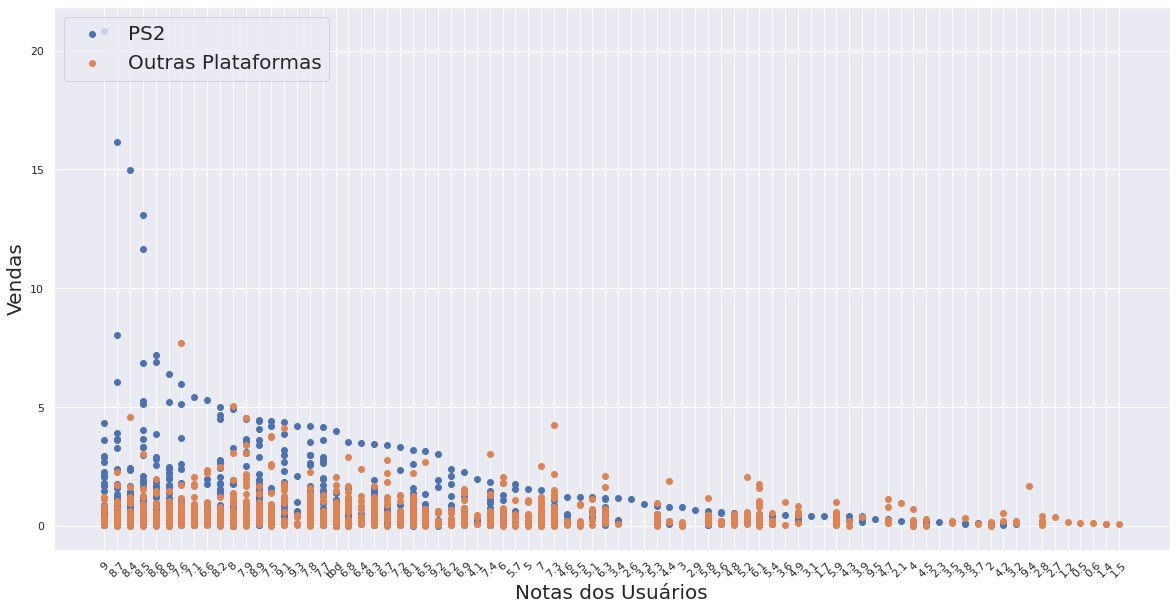

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_ps2['user_score'],df_ps2['sum_sales'], label='PS2')
ax1.scatter(df_compara_ps2['user_score'],df_compara_ps2['sum_sales'],label='Outras Plataformas')
plt.legend(loc='upper left',fontsize=20)
ax1.set_xlabel('Notas dos Usuários',fontsize=20)
ax1.set_ylabel('Vendas',fontsize=20)
plt.xticks(rotation = 45)
plt.show()

Comparando os dois graficos podemos ver que as notas dadas aos mesmos jogos em outras plataformas ou no ps2. As notas no ps2 são de forma geral mais altas e suas vendas também

In [43]:
vendas_ps2 = pd.pivot_table(df_ps2,index='name',values='sum_sales',aggfunc=sum)
vendas_ps2.reset_index(inplace=True)
vendas_ps2.head()

,name,sum_sales
0,.hack//Infection Part 1,1.26
1,.hack//Mutation Part 2,0.67
2,.hack//Outbreak Part 3,0.46
3,18 Wheeler: American Pro Trucker,0.40
4,187: Ride or Die,0.15


In [52]:
vendas_outros = pd.pivot_table(df_compara_ps2,index='name',values='sum_sales',aggfunc=sum)
vendas_outros.reset_index(inplace=True)
vendas_outros.head()

,name,sum_sales
0,18 Wheeler: American Pro Trucker,0.11
1,187: Ride or Die,0.06
2,2002 FIFA World Cup,0.24
3,25 to Life,0.17
4,50 Cent: Bulletproof,0.45


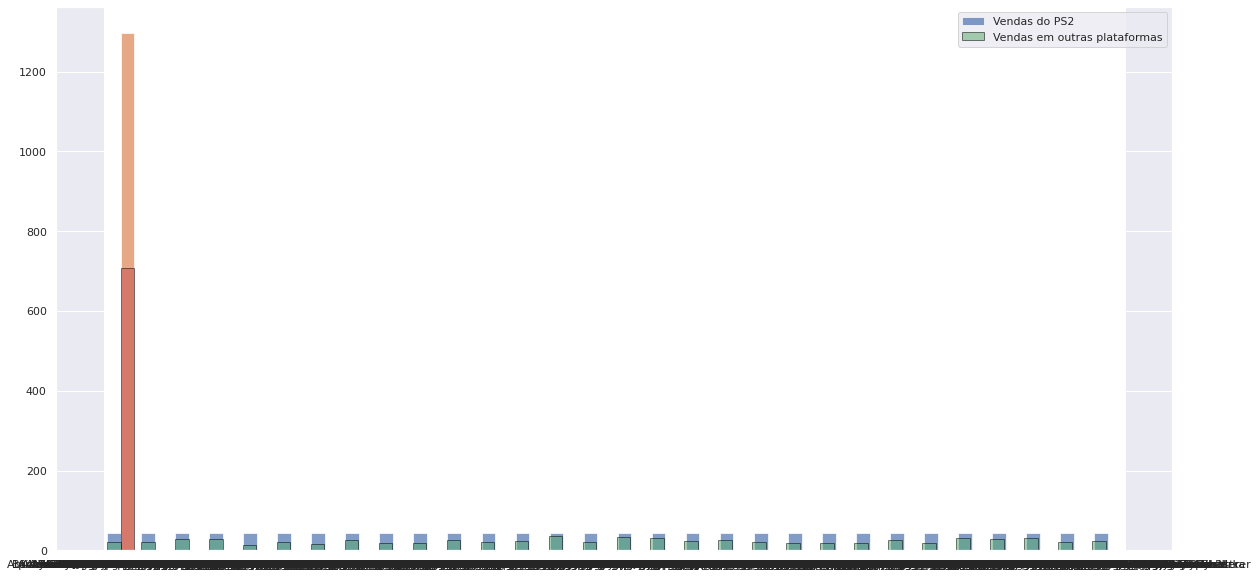

In [56]:
plt.hist(vendas_ps2, label='Vendas do PS2', alpha=0.7,bins=30) 
plt.hist(vendas_outros, label="Vendas em outras plataformas", alpha=0.5,edgecolor='black',bins=30) 
plt.legend() 
plt.show() 

Aqui estou plotando os dois histogramas juntos, as vendas por unidade no PS2 e em outras plataformas, uma coluna diferente aparece, e sinceramente não sei oq é, não são valores nulos, "0", ou um jogo especifico. Dessa forma irei verificar as vendas usando os histogramas separadamente. 

array([[<AxesSubplot:title={'center':'sum_sales'}>]], dtype=object)

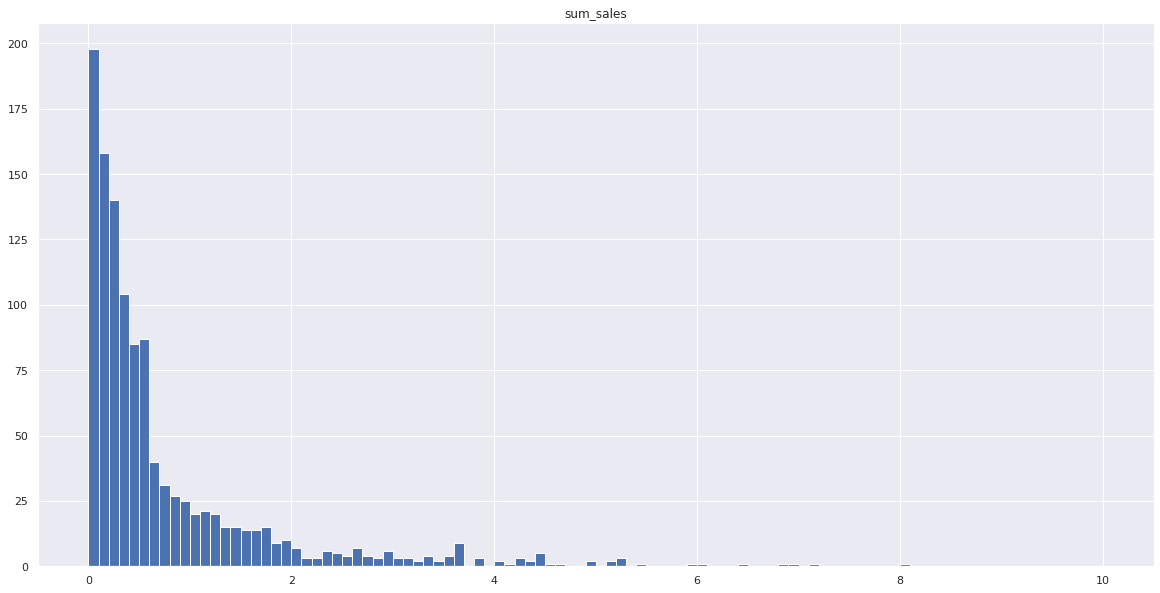

In [127]:
vendas_ps2 = pd.pivot_table(df_ps2,index='name',values='sum_sales',aggfunc=sum)
vendas_ps2.reset_index(inplace=True)
vendas_ps2.hist(bins=100,range=(0,10))

array([[<AxesSubplot:title={'center':'sum_sales'}>]], dtype=object)

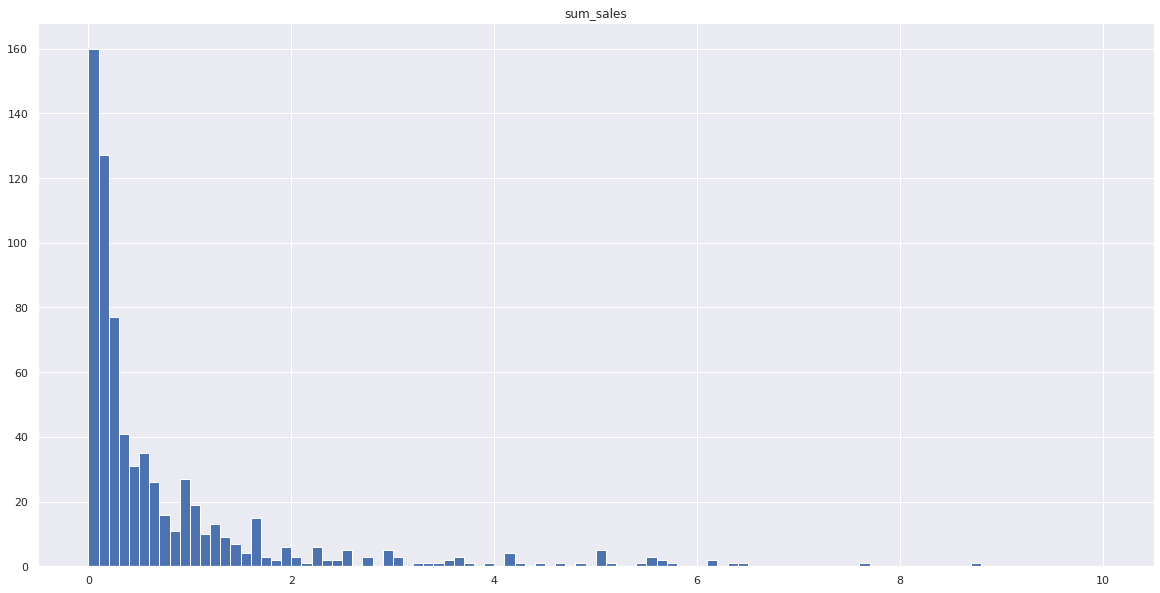

In [126]:
nome_vendas = pd.pivot_table(df_compara_ps2,index='name',values='sum_sales',aggfunc=sum)
nome_vendas.reset_index(inplace=True)
nome_vendas.hist(bins=100,range=(0,10))

[Podemos ver que as vendas por jogo individual são maiores no PS2 do que em outras plataformas. Algo esperado já que no grafico de relação nota por vendas, visto anteriormente, as vendas também estavam maiores comparadas as outras plataformas]

### Olhando a distribuição geral de jogos por gênero.

In [41]:
vendas_genero= pd.pivot_table(df_raw,index='genre',values='sum_sales',aggfunc='sum')
vendas_genero.sort_values('sum_sales',ascending=False,inplace=True)
vendas_genero.reset_index(inplace=True)
vendas_genero.columns=['Gênero','Vendas totais']
vendas_genero

,Gênero,Vendas totais
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Aqui podemos ter uma boa visão dos gêneros mais vendidos e mais populares para os menos vendidos e menos populares. Jogos de ação tem uma venda bem alta assim como de esportes

## Passo 4. Criando um perfil de usuário para cada região

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [42]:
vendas_genero= pd.pivot_table(df_raw,index='platform',values=['na_sales','eu_sales','jp_sales','other_sales','sum_sales'],aggfunc='sum')
vendas_genero.sort_values('sum_sales',ascending=False,inplace=True)
vendas_genero.reset_index(inplace=True)
vendas_genero.columns=['Plataforma','NA Vendas','EU Vendas','JP Vendas','Outras Vendas','Soma das vendas']
vendas_genero.head(5)

,Plataforma,NA Vendas,EU Vendas,JP Vendas,Outras Vendas,Soma das vendas
0,PS2,339.29,139.20,583.84,193.44,1255.77
1,X360,270.76,12.43,602.47,85.76,971.42
2,PS3,330.29,80.19,393.49,135.68,939.65
3,Wii,262.21,69.33,496.90,79.07,907.51
4,DS,188.89,175.57,382.40,59.26,806.12


Podemos ver que o Japão lidera em vendas de plataformas de video-games, não só nos video-games que são fabricados por lá como também nos que são feitos em NA.

### Os cinco principais gêneros.

In [43]:
vendas_genero= pd.pivot_table(df_raw,index='genre',values=['na_sales','eu_sales','jp_sales','other_sales','sum_sales'],aggfunc='sum')
vendas_genero.sort_values('sum_sales',ascending=False,inplace=True)
vendas_genero.reset_index(inplace=True)
vendas_genero.columns=['Gênero','NA Vendas','EU Vendas','JP Vendas','Outras Vendas','Soma das vendas']
vendas_genero.head(5)

,Gênero,NA Vendas,EU Vendas,JP Vendas,Outras Vendas,Soma das vendas
0,Action,519.13,161.43,879.01,184.60,1744.17
1,Sports,376.79,135.54,684.43,134.51,1331.27
2,Shooter,317.34,38.76,592.24,104.11,1052.45
3,Role-Playing,188.71,355.41,330.81,59.63,934.56
4,Platform,200.35,130.83,445.50,51.09,827.77


Podemos ver que assim como na venda de consoles o Japão lidera a maioria das vendas também por gênero dentre os principais gêneros vendidos perdendo somente no gênero RPG para a EU

### As classificações do ESRB afetam as vendas em regiões individuais?

In [44]:
df_raw.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nenhum,40.24


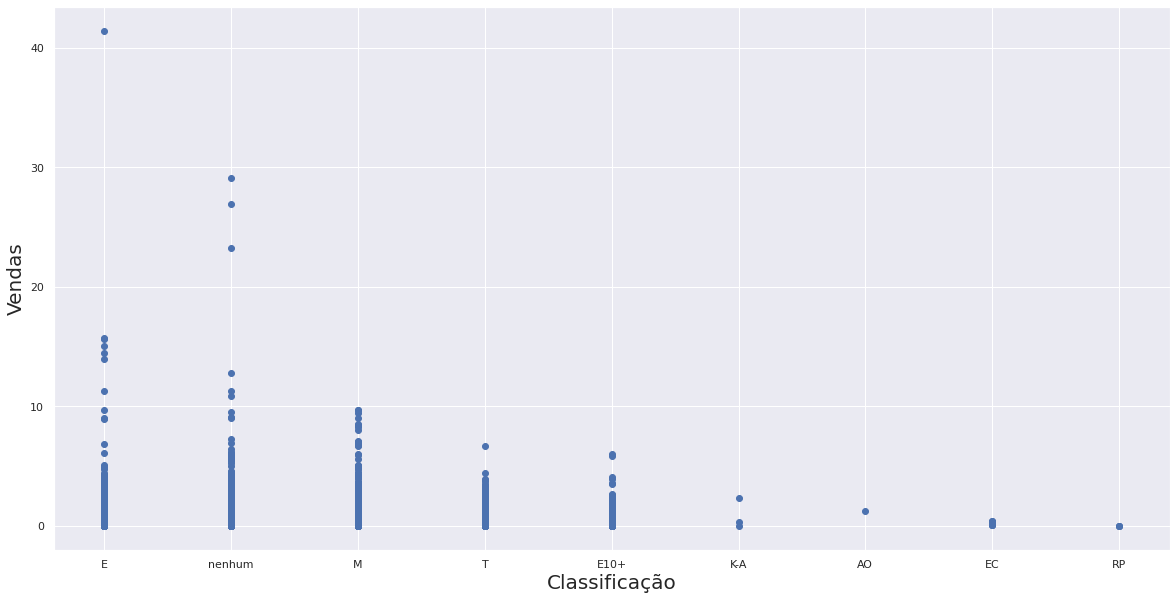

In [45]:
df_Na_esrb = pd.DataFrame()
df_Na_esrb['na_sales'] = df_raw['na_sales']
df_Na_esrb['rating'] = df_raw['rating']
plt.figure(figsize=(20, 10))
plt.scatter(df_Na_esrb['rating'],df_Na_esrb['na_sales'],c='b')
plt.xlabel('Classificação',fontsize=20)
plt.ylabel('Vendas',fontsize=20)
plt.show()

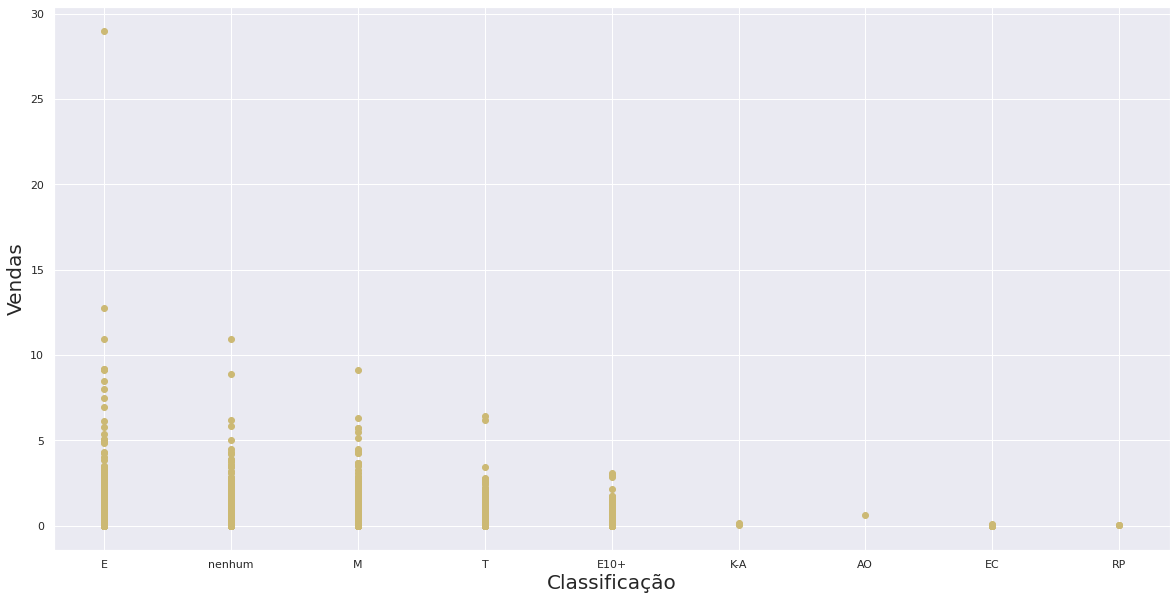

In [46]:
df_EU_esrb = pd.DataFrame()
df_EU_esrb['eu_sales'] = df_raw['eu_sales']
df_EU_esrb['rating'] = df_raw['rating']
plt.figure(figsize=(20, 10))
plt.scatter(df_EU_esrb['rating'],df_EU_esrb['eu_sales'],c='y')
plt.xlabel('Classificação',fontsize=20)
plt.ylabel('Vendas',fontsize=20)
plt.show()

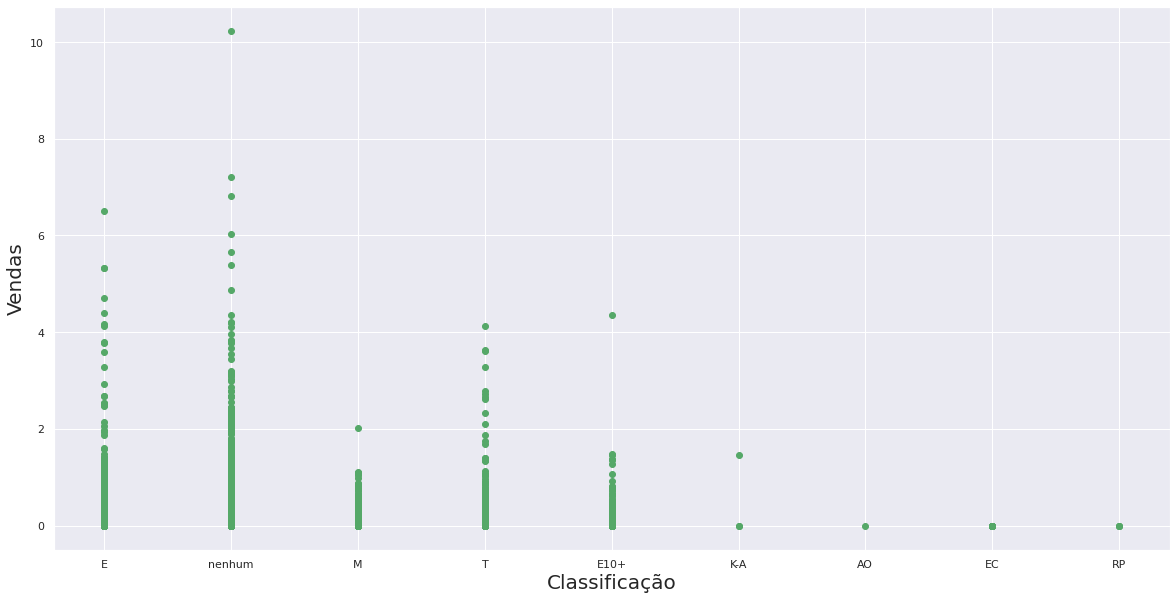

In [47]:
df_JP_esrb = pd.DataFrame()
df_JP_esrb['jp_sales'] = df_raw['jp_sales']
df_JP_esrb['rating'] = df_raw['rating']
plt.figure(figsize=(20, 10))
plt.scatter(df_JP_esrb['rating'],df_JP_esrb['jp_sales'],c='g')
plt.xlabel('Classificação',fontsize=20)
plt.ylabel('Vendas',fontsize=20)
plt.show()

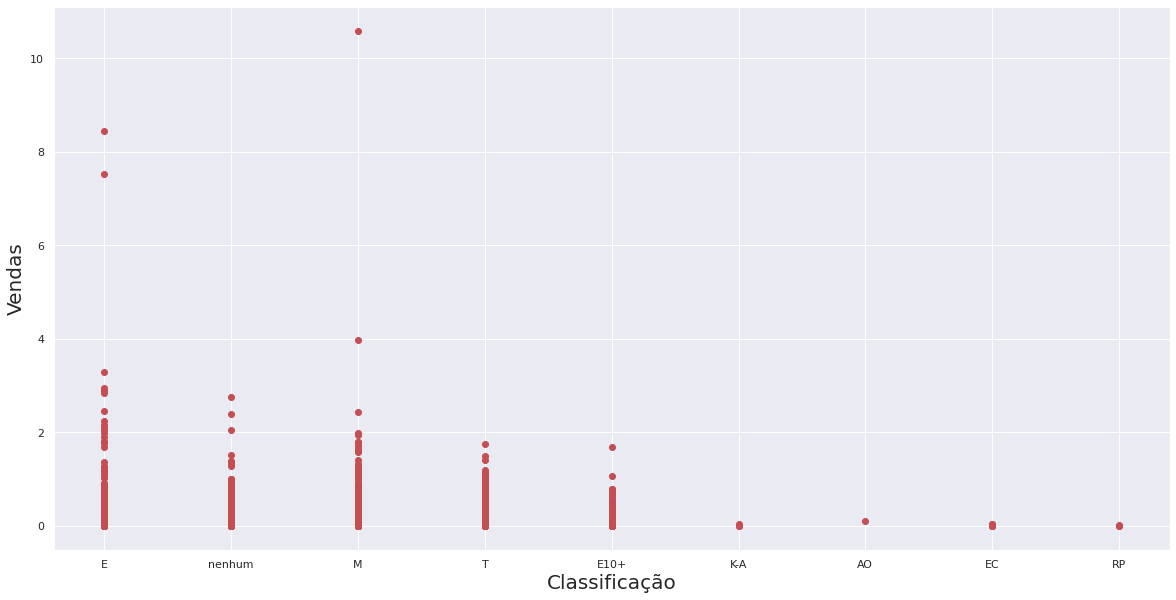

In [48]:
df_other_esrb = pd.DataFrame()
df_other_esrb['other_sales'] = df_raw['other_sales']
df_other_esrb['rating'] = df_raw['rating']
plt.figure(figsize=(20, 10))
plt.scatter(df_other_esrb['rating'],df_other_esrb['other_sales'],c='r')
plt.xlabel('Classificação',fontsize=20)
plt.ylabel('Vendas',fontsize=20)
plt.show()

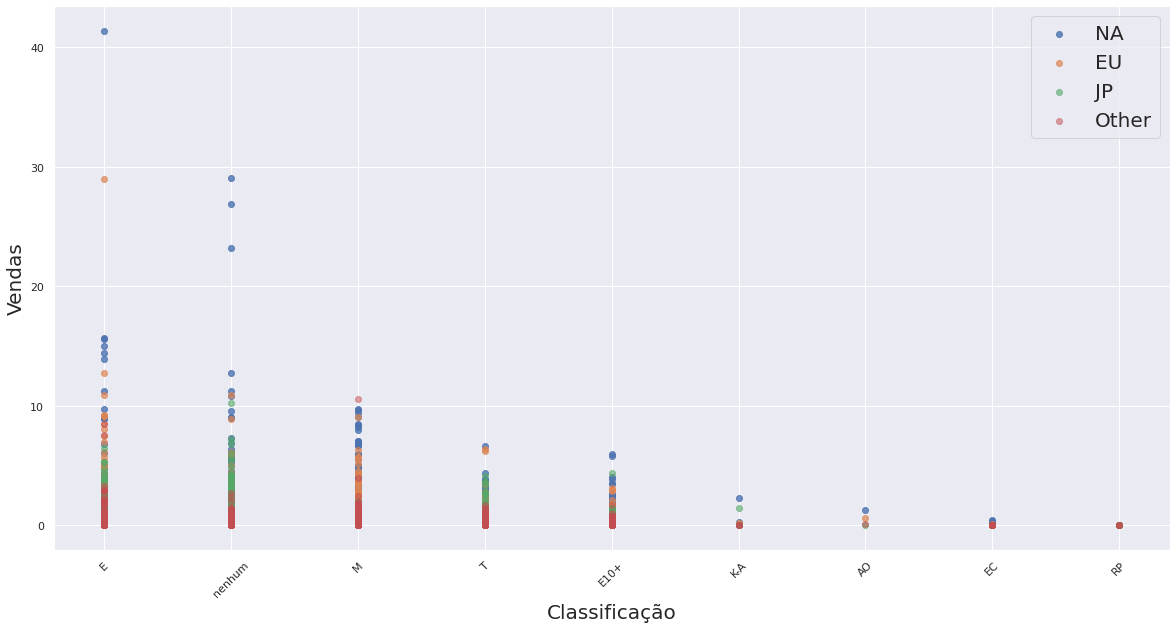

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_raw['rating'],df_raw['na_sales'], label='NA',alpha=0.8)
ax1.scatter(df_raw['rating'],df_raw['eu_sales'],label='EU',alpha=0.7)
ax1.scatter(df_raw['rating'],df_raw['jp_sales'],label='JP',alpha=0.6)
ax1.scatter(df_raw['rating'],df_raw['other_sales'],label='Other',alpha=0.5)
plt.legend(loc='upper right',fontsize= 20)
ax1.set_xlabel('Classificação',fontsize= 20)
ax1.set_ylabel('Vendas',fontsize= 20)
plt.xticks(rotation = 45)
plt.show()

Como primeiro ponto podemos ver que existe um grande vazio de classificações,em todas as regiões que deve ser verificada e corrigida.

Todos os mercados compram muitos jogos na classificação E, Japão tem uma compra maior nos jogos classificados com T, as outras regiões tem muitas compras com a classificação M.

## Passo 5. Testando as seguintes hipóteses:

### Hipotese 1— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Com essa primeira hipotese irei testar se ''As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas'', sendo essa minah hipótese nula a hipótese alternativa é que as classificações médias não serão as mesmas entre essas duas plataformas. 

Irei retirar o valor tbd da coluna de user_score, para poder fazer os calculos corretamente

In [50]:
df_raw.replace('tbd', np.nan, regex=True,inplace=True)


retirado o valor str da coluna posso finalmente converte-la

In [51]:
df_raw['user_score'] = df_raw['user_score'].astype(float)

In [52]:
df_XOne = df_raw[df_raw['platform'] == 'XOne']
df_XOne[df_XOne['platform']=='XOne']['user_score']

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

In [53]:
df_pc = df_raw[df_raw['platform'] == 'PC']
df_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.0,0.20,NaN,NaN,nenhum,5.11
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83


In [54]:

results = st.ttest_ind(df_XOne[df_XOne['platform']=='XOne']['user_score'],df_pc[df_pc['platform']=='PC']['user_score'], nan_policy = 'omit')

print('p-value: ', results.pvalue)

p-value:  1.3896435533548819e-05


In [55]:
alpha = 0.05 

teste1 = df_XOne[df_XOne['platform']=='XOne']['user_score']
teste2 = df_pc[df_pc['platform']=='PC']['user_score']

results = st.ttest_ind(teste1,teste2,equal_var=True, nan_policy = 'omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

p-value:  1.3896435533548819e-05
Rejeitamos a hipótese nula


[Podemos concluir que as notas médias entre usuarios de PC e Xbox, não são similares talvez os usuários de PC sejam mais exigentes com os jogos ou vice e versa, uma nova análise deveria ser feita para conclusões mais assertivas ]

### Hipótese 2 — As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Minha hipótese nula nesse caso será:''As classificações médias de usuários para os gêneros Action e Sports são diferentes''.
Já minha hipótese alternativa será o caso em que as classificações para Action e Sports não são diferentes. 

In [56]:
df_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nenhum,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nenhum,31.38


In [58]:
teste_1 = df_raw[df_raw['genre'] == 'Action']['user_score']
teste_2 = df_raw[df_raw['genre'] == 'Sports']['user_score']

In [59]:

results = st.ttest_ind(teste_1,teste_2, nan_policy = 'omit')

print('p-value: ', results.pvalue)

p-value:  0.1040695135904947


In [60]:
alpha = 0.05 


results = st.ttest_ind(teste_1,teste_2,equal_var=False, nan_policy = 'omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

p-value:  0.11483818791498648
Nós não podemos rejeitar a hipótese nula


    Com isso podemos ver que realmente as classificações médias entre o gênero de ação e o gênero de esportes não são tão diferentes como foi imaginado, apresentando classificações bem parecidas